In [1]:
from methods_preparation import MethodsPreparation
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from paretochart import pareto
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import os

warnings.filterwarnings("ignore", category=Warning) 
sns.set_style("ticks")
sns.set_context("talk")
methods = MethodsPreparation()

### Data Aquisition

In [2]:
df = pd.read_csv(os.getcwd()+"\\..\\..\\Data\\Raw\\Country_data.csv")
df= df.set_index("country")
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 13.0+ KB


### Data Preparation

In [4]:
count = df.index.value_counts().sum()
total = f'Total de Países no DataFrame: {count}'
print(total)

Total de Países no DataFrame: 167


*Verificação de dados nulos*

In [5]:
df.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização.

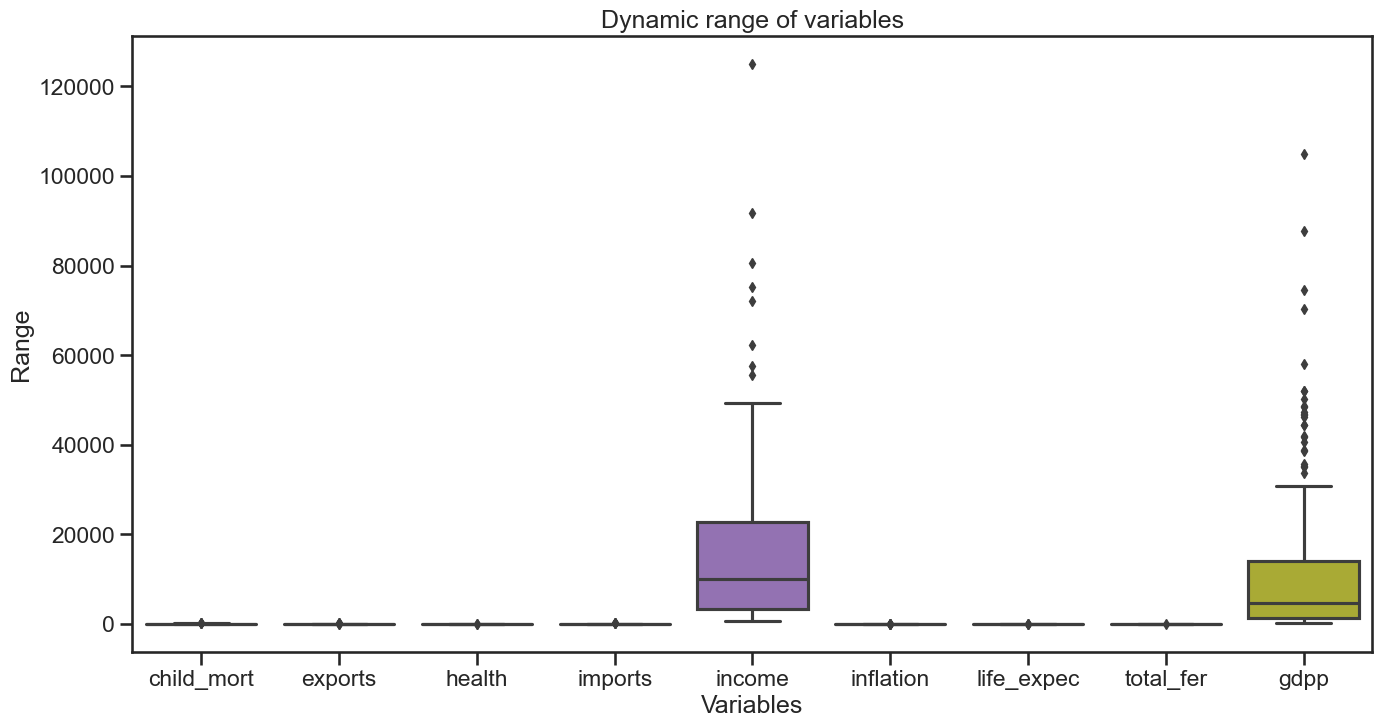

In [6]:
plt.figure(figsize=(16,8))
plt.title('Dynamic range of variables')
plt.xlabel('Variables')
plt.ylabel('Range')
sns.boxplot(df)
plt.show();



Pairplot para visualizar variáveis

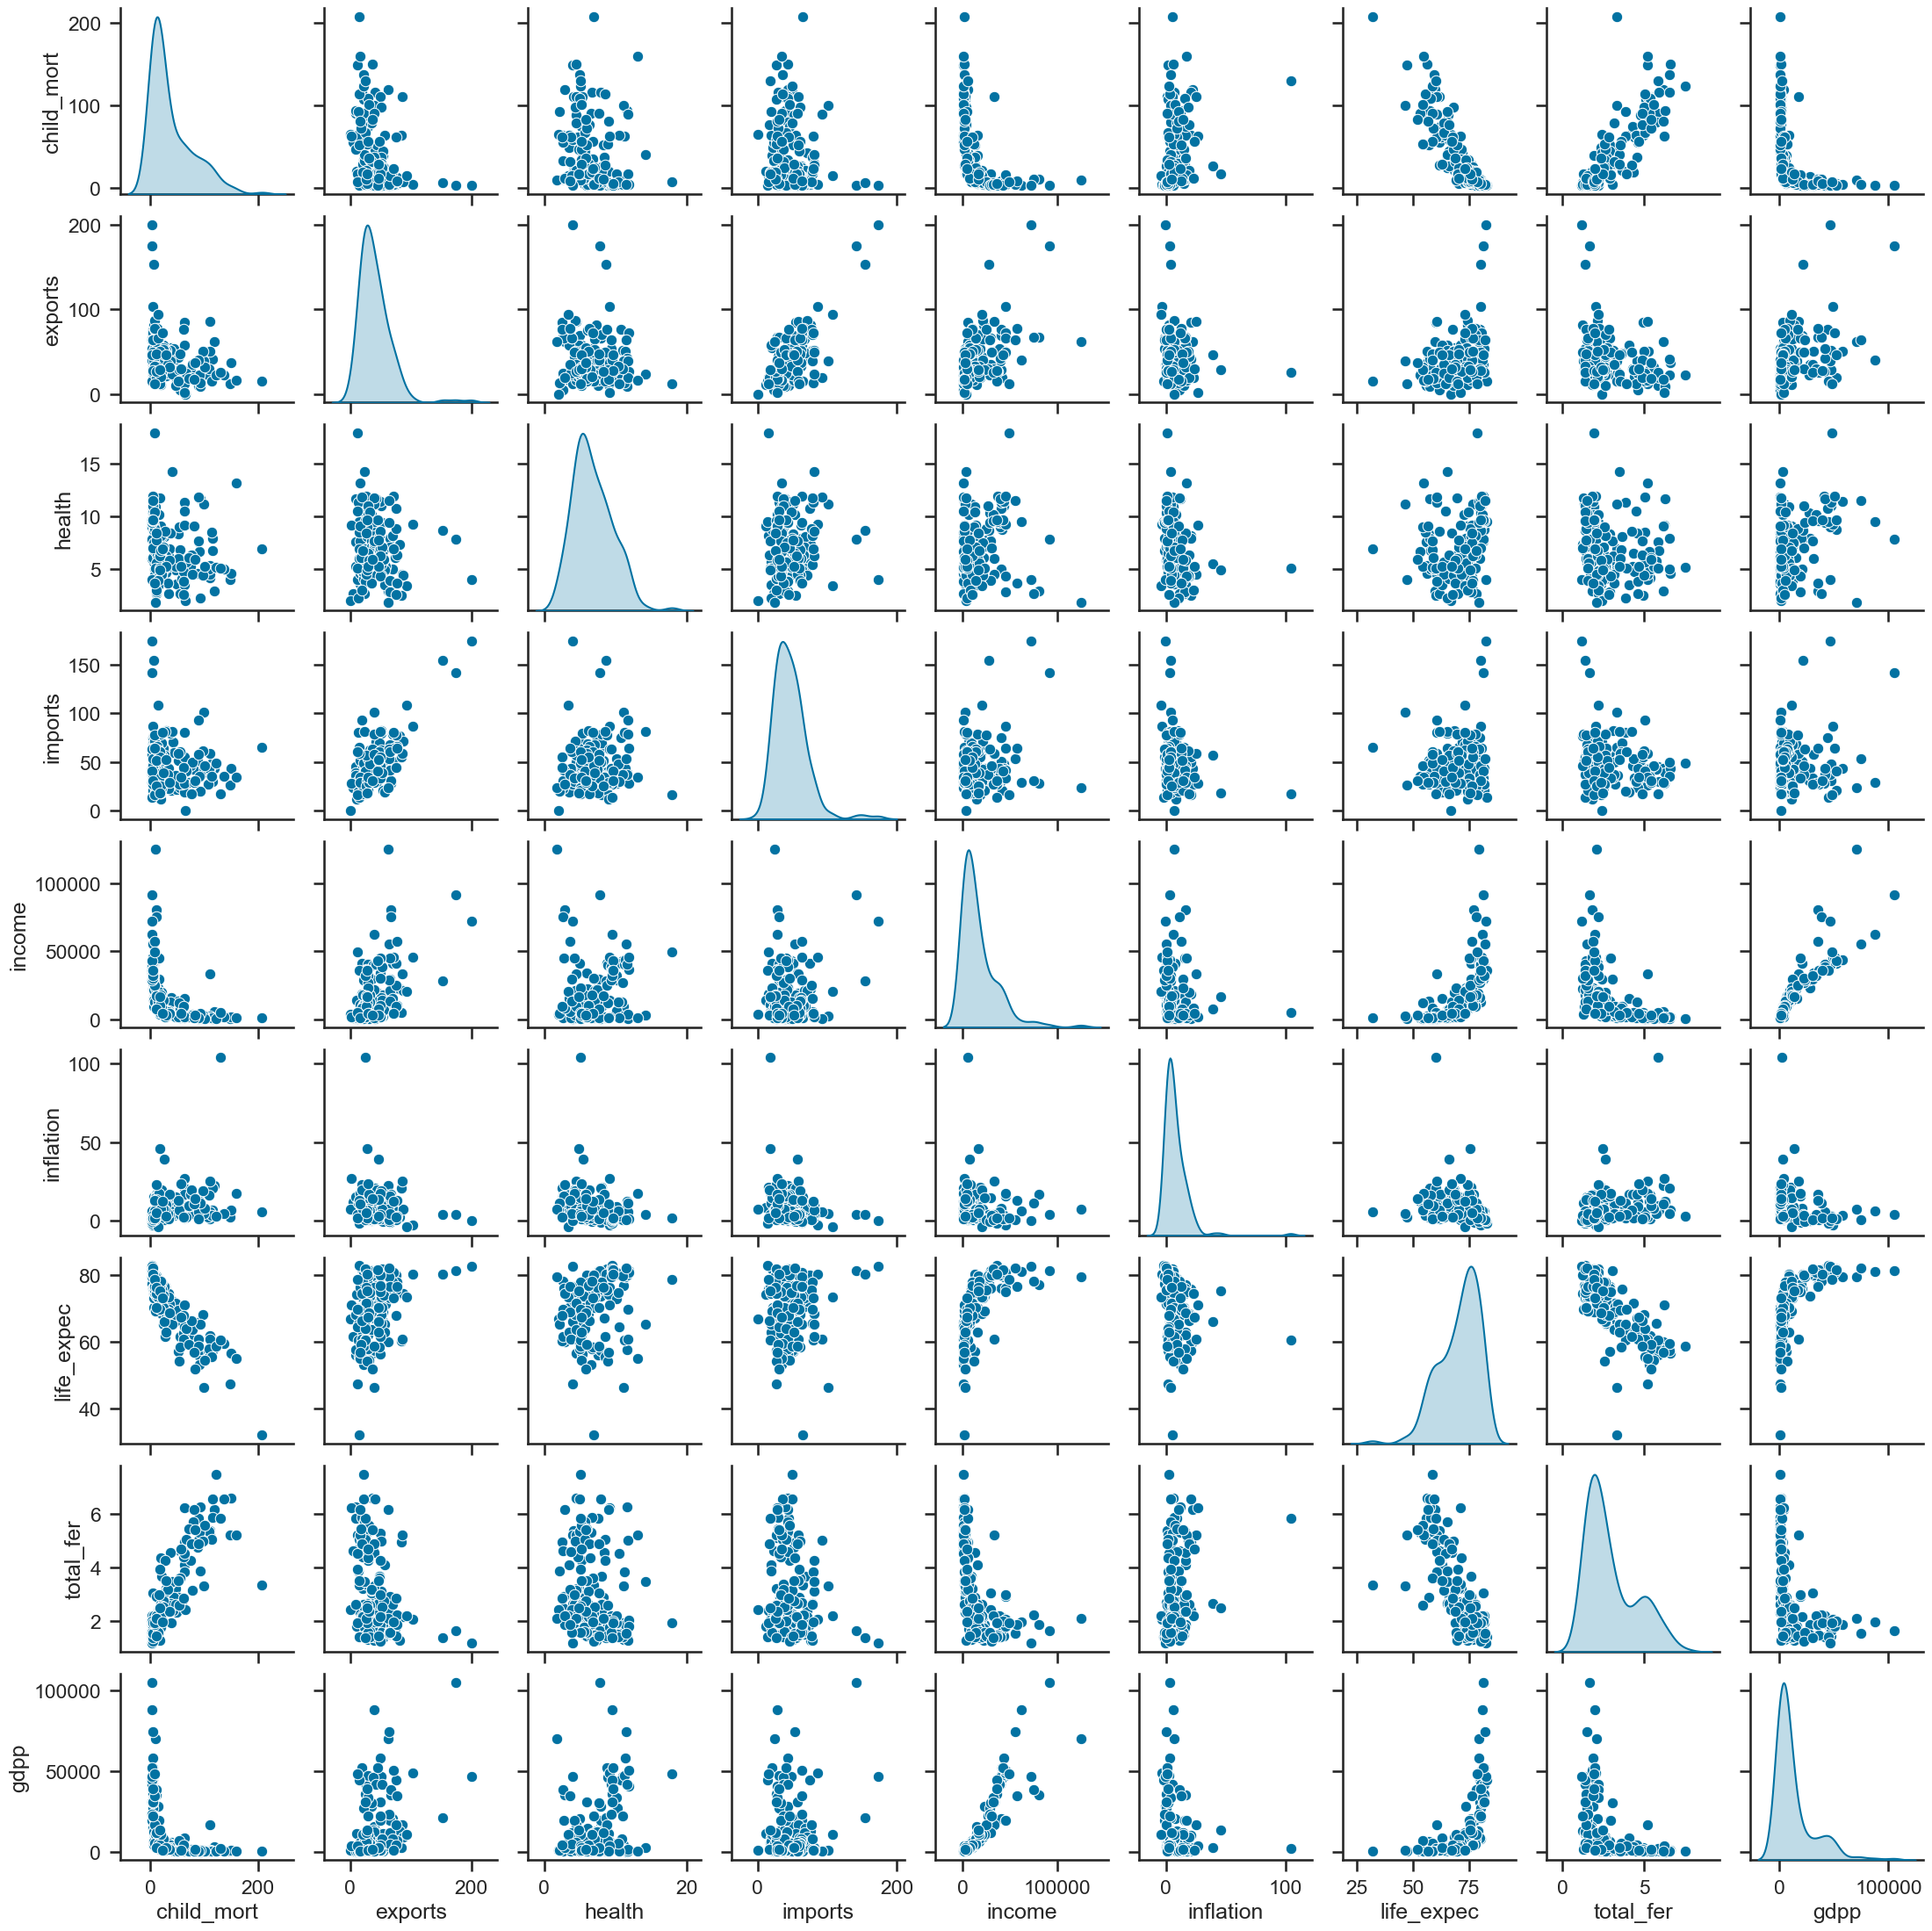

In [9]:
sns.pairplot(df, diag_kind="kde");

*Analisando dos Plots*

Através do gráfico acima, percebemos duas variaveis com distribuição exponencial com calda longa, sendo assim, faremos 3 tratamentos nesses dados de forma distinta. O qual serão usados na etapa de modelagem. 

**Os tratamentos:**

*   1- Log() em duas variáveis com maior exponencialidade: *icome*, *gdpp* e será excluído o país Myanmar por apresentar inconsistências nos dados de *Importação* e *Exportação*.

*   2- Repetiremos o passo 1, porém, os dados serão submetidos a PCA.

*   3- Serão excluidos todos os outliers (Países) do df e será aplicado StandardScaler

Todas essas etapas de verificar *outlier's, nulos e tipos de variáveis*, são importantes e devem ser feitas antes do pré-processamento

#### 1º Tratamento

In [6]:
df1 = df.copy()

In [7]:
print(f"Importações Myanmar : {df1.imports.sort_values()[0]}")

print(f"Exportações Myanmar: {df1.exports.sort_values()[0]}")

Importações Myanmar : 0.0659
Exportações Myanmar: 0.109


In [8]:
df1.drop(index='Myanmar', inplace=True)

In [9]:
df_log = df1.copy()
df_log['income'] = np.log(df_log.income)
df_log['gdpp'] = np.log(df_log.gdpp)

In [10]:
df_scaled_log = methods.preprocessing(df_log)

df_scaled_log.to_csv(os.getcwd()+"\\..\\..\\Data\\Processed\\df1_scaled_log.csv")

df1.to_csv(os.getcwd()+"\\..\\..\\Data\\Processed\\df1_log.csv")


**Visualização**

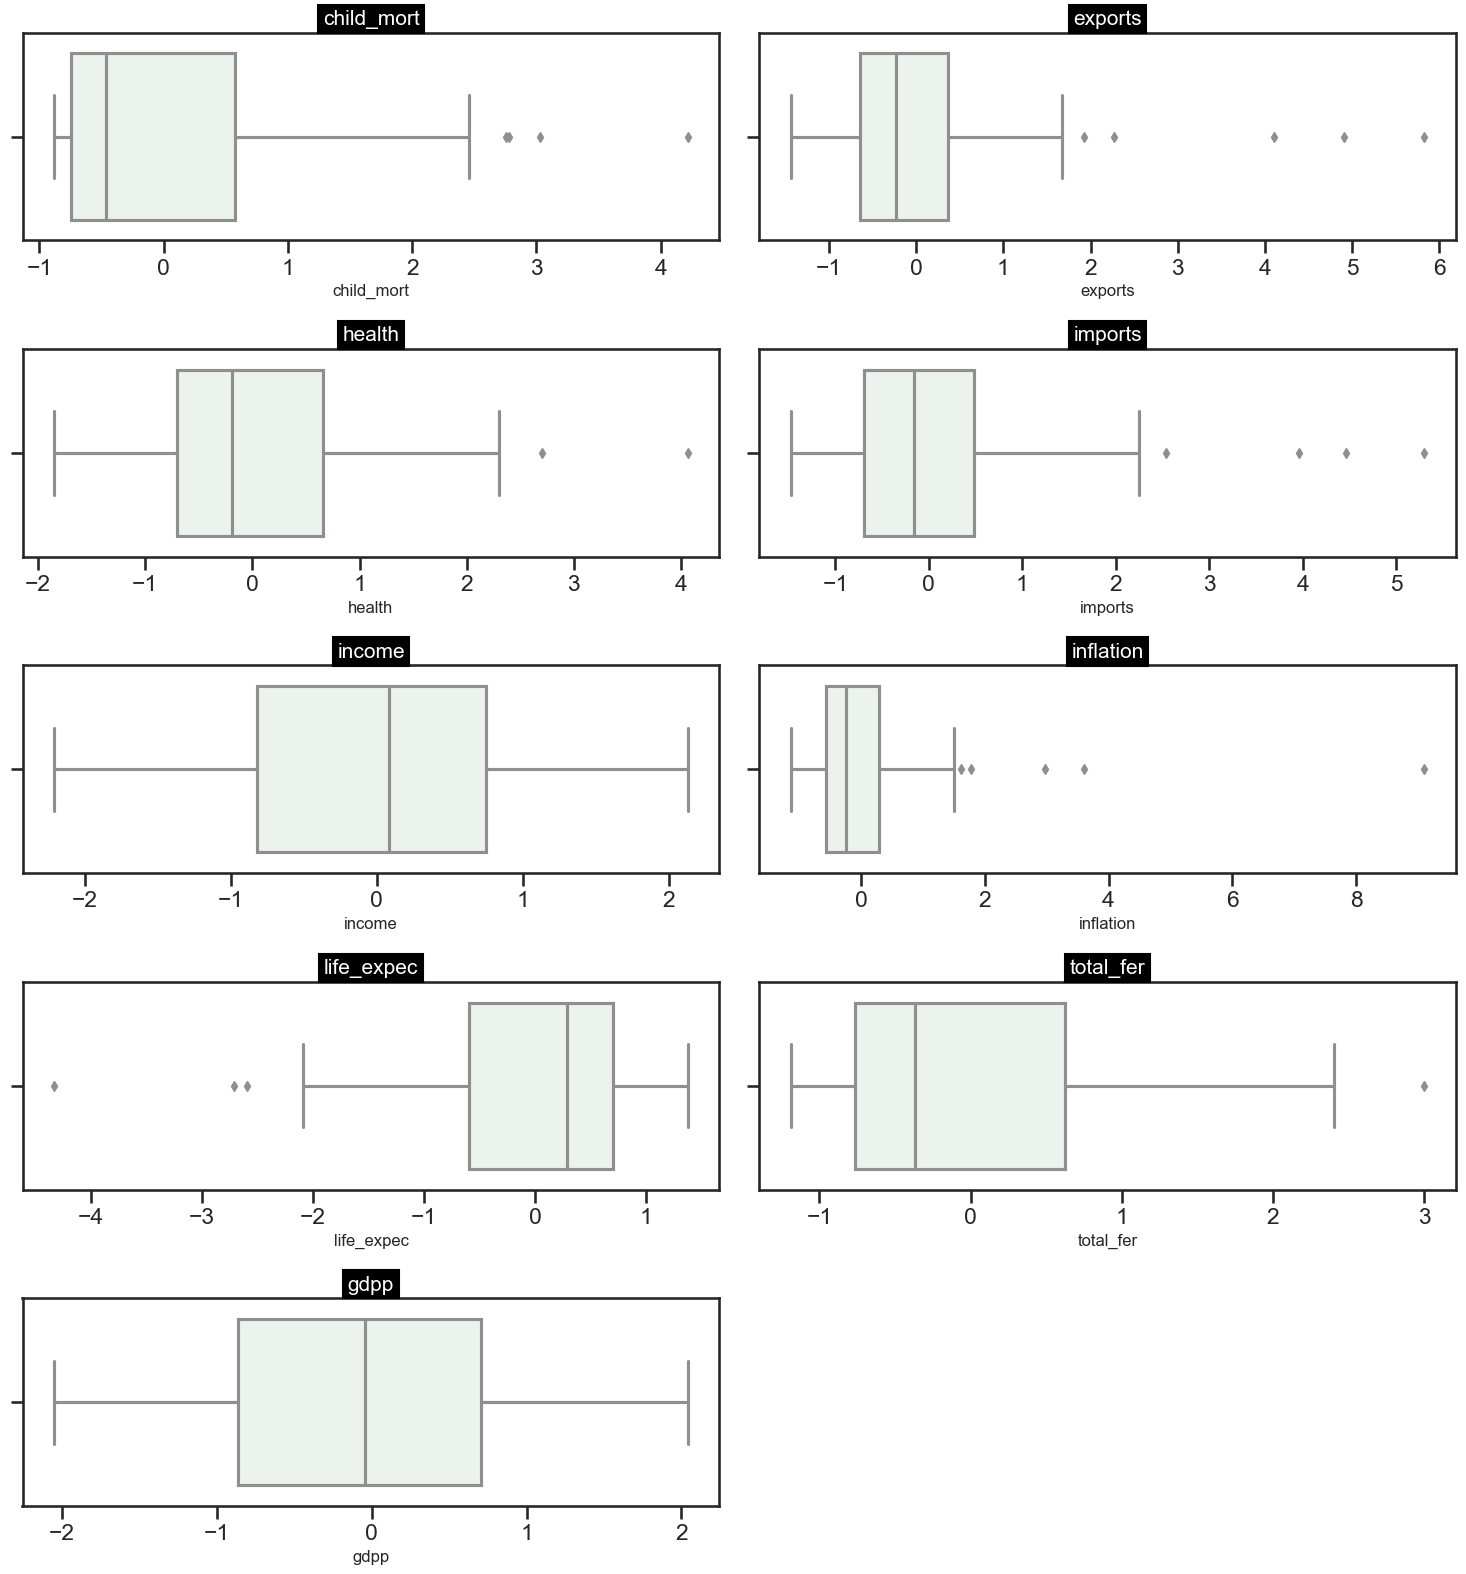

In [22]:
methods.plot_variables(df_scaled_log)

#### 2º Tratamento

In [18]:
df2_log = df_log.copy()

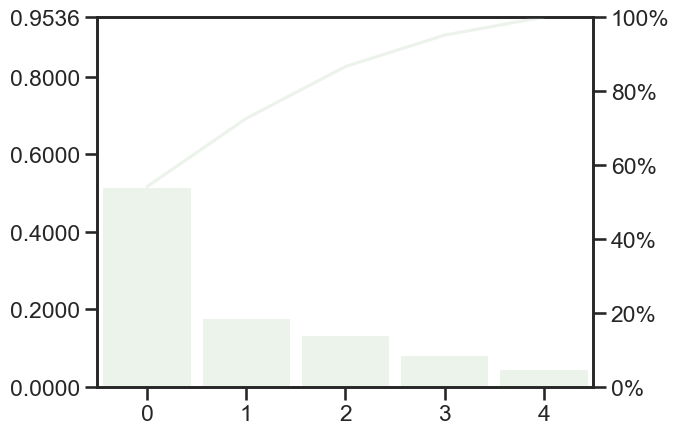

In [19]:
df2_log_pca = methods.preprocessing(df2_log)

n_components = 5
pca = PCA(n_components=n_components)
df2_pca = pca.fit_transform(df2_log_pca)


df2_scaled_pca = pd.DataFrame(df2_pca, 
                              columns=[f'PC{i+1}' for i in range(n_components)], 
                              index=df2_log_pca.index)


pareto(pca.explained_variance_ratio_);

In [20]:
df2_scaled_pca.to_csv(os.getcwd()+"\\..\\..\\Data\\Processed\\df2_scaled_pca.csv")

**Visualização**

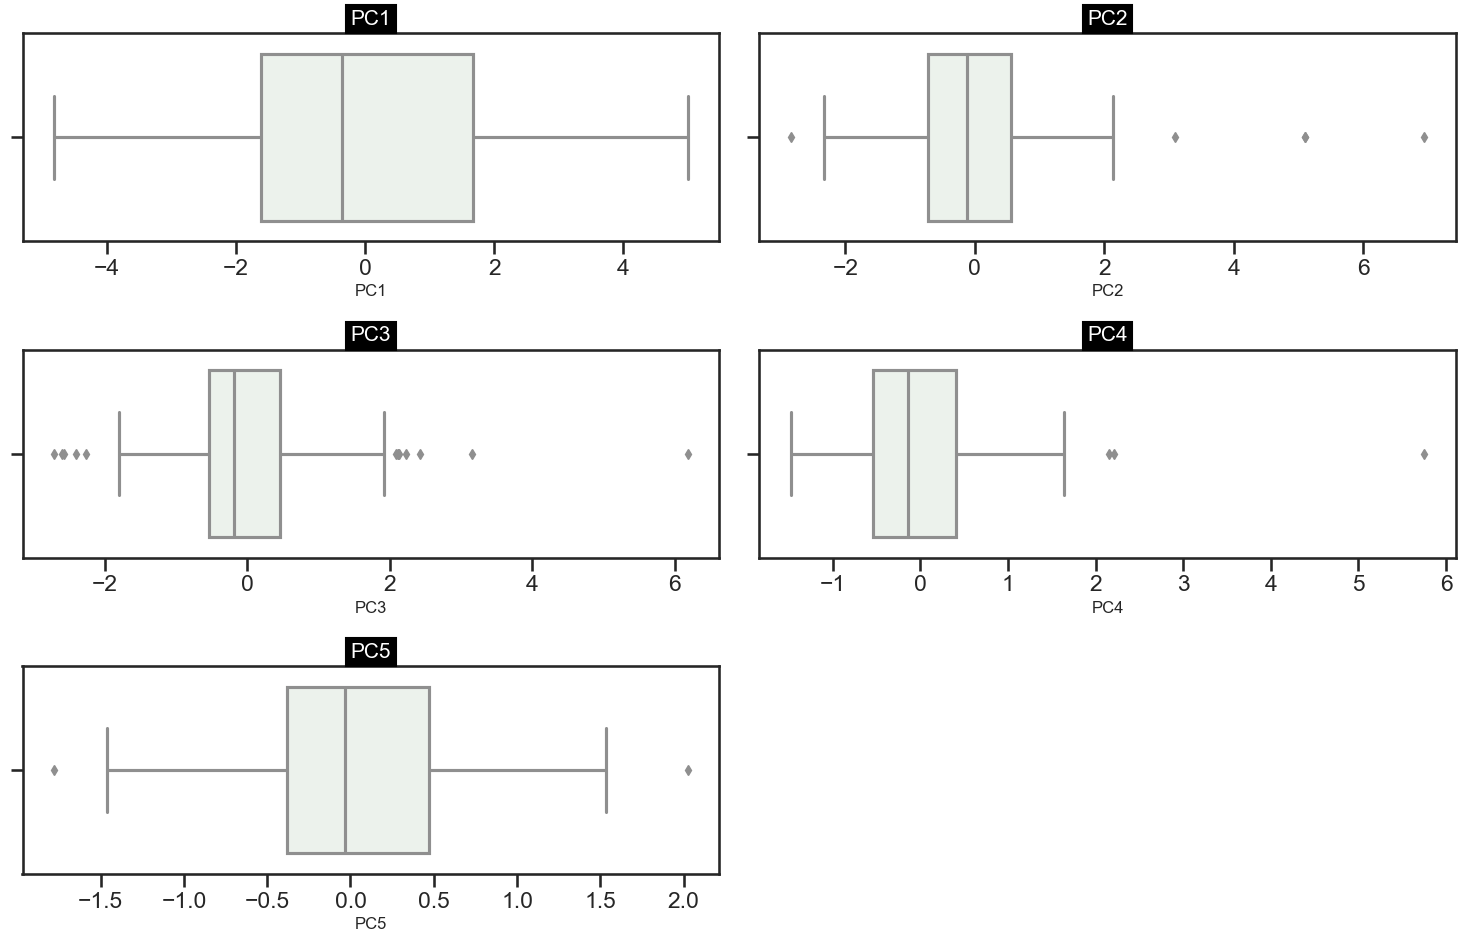

In [21]:
methods.plot_variables(df2_scaled_pca)

#### 3º Tratamento

In [14]:
df3 = df.copy()

In [15]:
df3= df3[df3['child_mort']<170]
df3= df3[df3['exports']<105]
df3= df3[df3['health']<12]
df3= df3[df3['imports']<109]
df3= df3[df3['income']<91800]
df3= df3[df3['inflation']<27]
df3= df3[df3['total_fer']<7]
df3= df3[df3['gdpp']<60000]
df3= df3[df3['life_expec']>50]

In [16]:
df3_scaled_outlier = methods.preprocessing(df3,)

df3_scaled_outlier.to_csv(os.getcwd()+"\\..\\..\\Data\\Processed\\df3_scaled_outlier.csv")

df3.to_csv(os.getcwd()+"\\..\\..\\Data\\Processed\\df3_outlier.csv")

**Visualização**

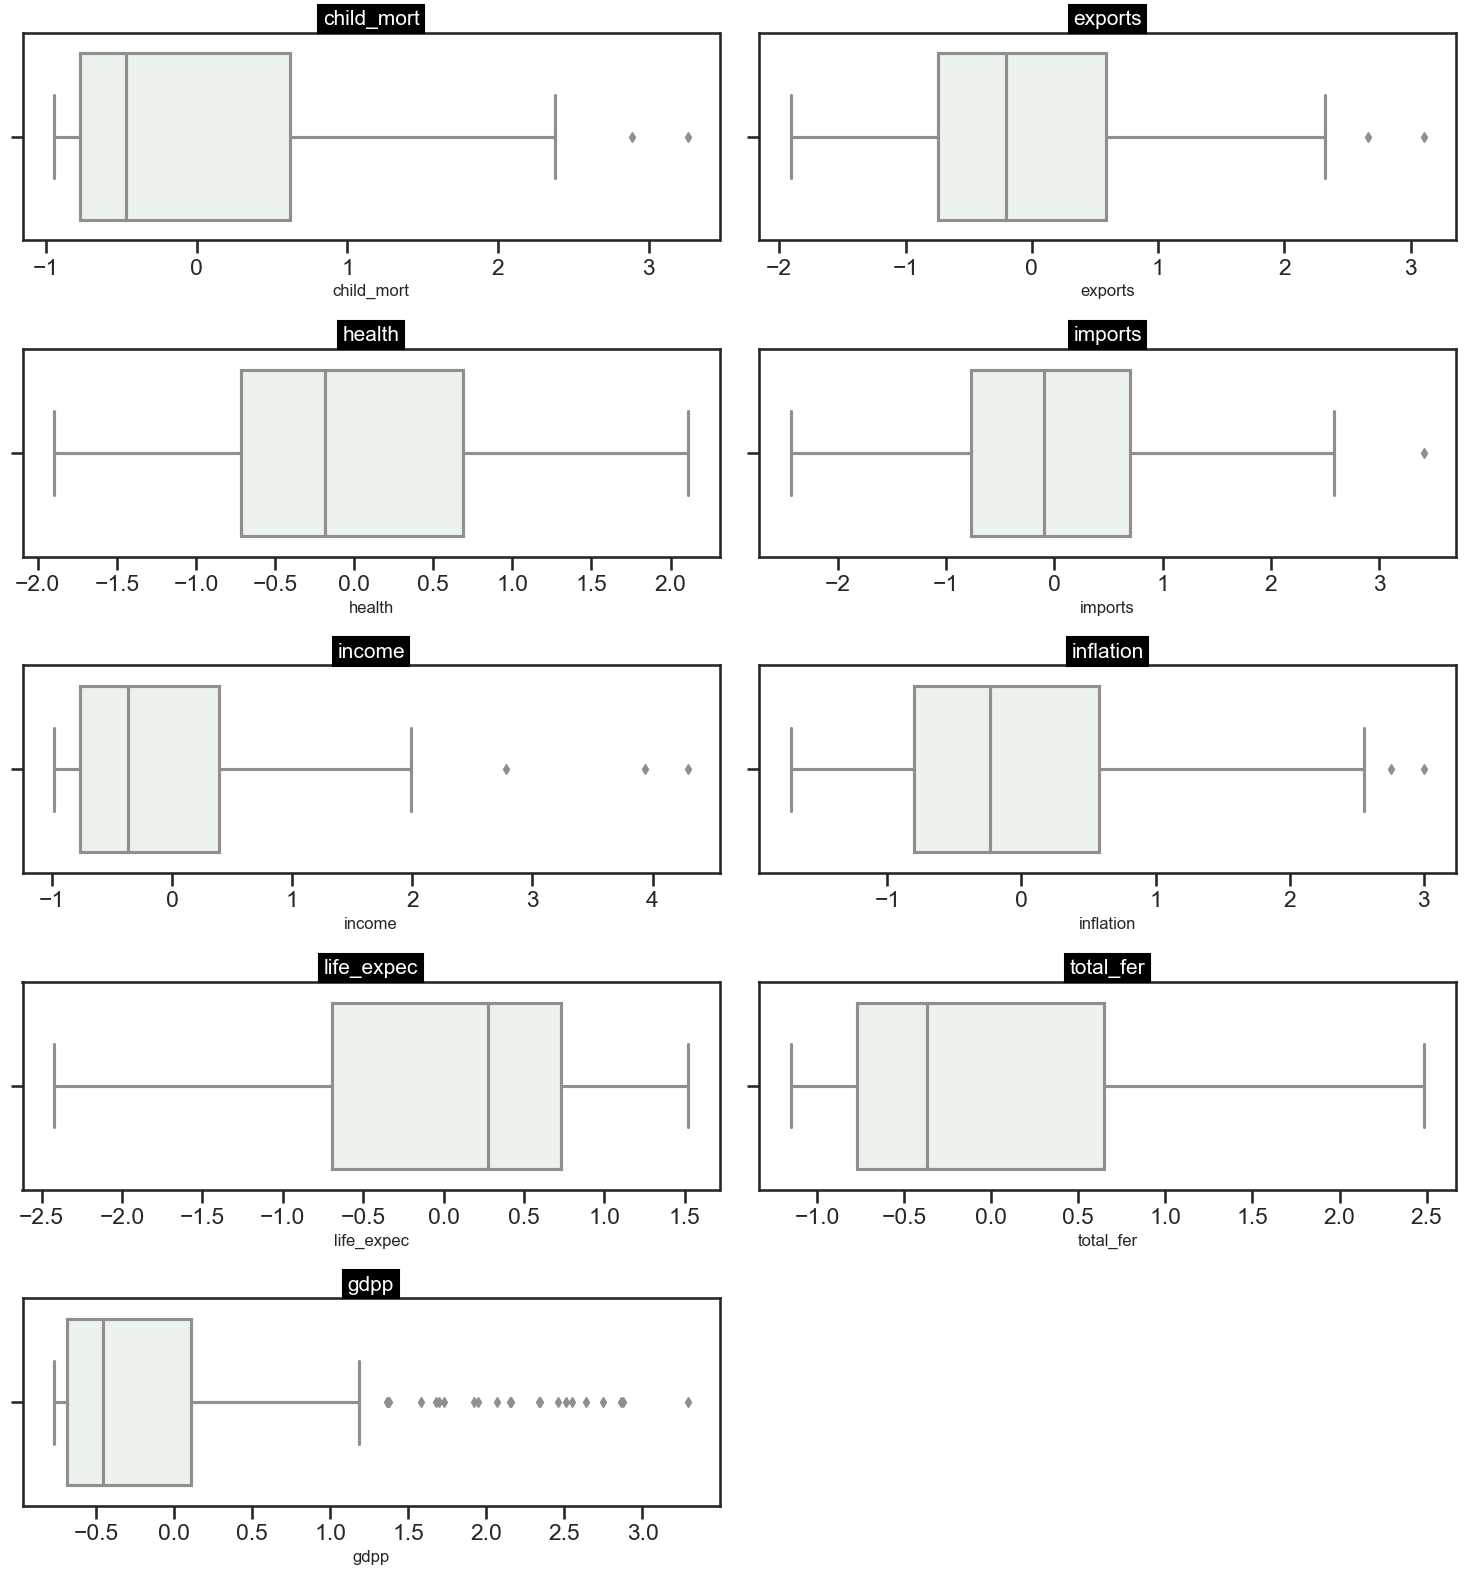

In [17]:
methods.plot_variables(df3_scaled_outlier)